# Face detection

## 1. Loading the image
<b>Functions used:</b>
- cv2.imread(path)

In [40]:
import cv2

In [41]:
# Reading the image
# - cv2.imread(path): Reads an image from the specified file.
#   - `path` is the location of the image on your system (e.g., '../imgs/people1.jpg').
#   - The image is read in **BGR** (Blue, Green, Red) color format by default in OpenCV.
#   - If the image cannot be read (wrong path or file type), it will return `None`.
path_p1 = '../imgs/people1.jpg'  # Define the path where the image is located
image_p1 = cv2.imread(path_p1)  # Read the image from the specified path

## 2. Preprocessing the image
<b>Functions used:</b>
- image.shape
- cv2.imshow("window_name", image)
- cv2.waitKey(0)
- cv2.destroyAllWindows()
- cv2.resize(image, new_size)
- cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [42]:
print("original image shape:", image_p1.shape)  
# Returns the shape of the image as a tuple: (height, width, channels)
# - height: Number of rows (pixels) in the image.
# - width: Number of columns (pixels) in the image.
# - channels: Number of color channels (e.g., 3 for RGB, 1 for grayscale).

original image shape: (1280, 1920, 3)


In [43]:
'''
    OpenCV creates a separate GUI window for image display. This doesn't integrate well with VSCode notebooks, which aim to display content directly in the notebook interface.
'''
def show_image_using_cv2(image):
    # Display the image in a window titled "test"
    # - cv2.imshow(window_name, image): Opens a new window to display the image.
    cv2.imshow("test", image)

    # Wait for the user to press any key before proceeding
    # - cv2.waitKey(delay): Waits for a key press for a specified delay (in milliseconds).
    #   - If delay=0, it waits indefinitely for a key press.
    #   - The function returns the ASCII value of the key pressed.
    # - Necessary in GUI-based applications to prevent the program from closing abruptly.
    cv2.waitKey(0)

    # Close all OpenCV windows
    # - cv2.destroyAllWindows(): Closes all windows opened by OpenCV.
    #   - Ensures no residual windows remain after the program ends.
    cv2.destroyAllWindows()

# Call the function to display the image
# show_image_using_cv2(image_p1)


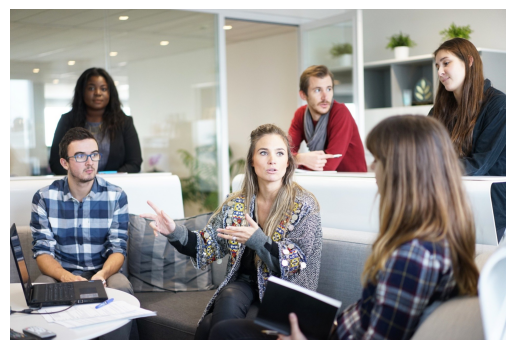

In [44]:
'''
    Matplotlib is designed for inline visualization, making it an ideal choice for displaying images and plots directly within the notebook.
'''
from matplotlib import pyplot as plt

def show_image(image):
    # Convert the image from BGR to RGB format
    # - OpenCV uses BGR color format by default, but Matplotlib expects RGB.
    # - Conversion ensures the colors are displayed correctly.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Use Matplotlib to display the image
    plt.imshow(image_rgb)  # Render the image in RGB format
    plt.axis('off')  # Optional: Remove the axes for a cleaner display
    plt.show()  # Show the image directly in the notebook

# Call the function to display the image in the notebook
show_image(image_p1)


We need to resize the image because it is too large and takes more time to process

In [45]:
# Resizing the image to a new size
# - cv2.resize(image, size): Resizes the image to the specified size.+
#   - `size` is the new size in the form of a tuple (width, height).
#     In this case, we set the new size to 800x600 pixels.
new_size = (800, 600)
image_p1 = cv2.resize(image_p1, new_size)

# Displaying the new image shape
print("new image shape:", image_p1.shape)


new image shape: (600, 800, 3)


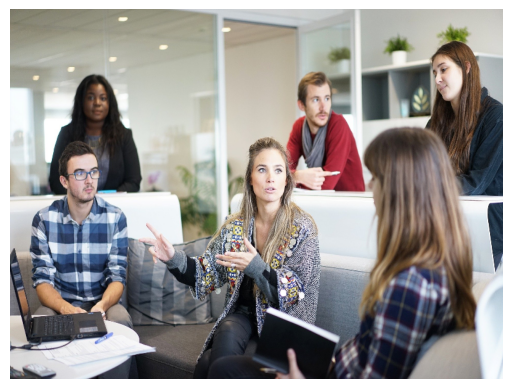

In [46]:
# Displaying the image using the `show_image()` function
show_image(image_p1)

When converting an image to grayscale, we reduce the amount of information:
- The original image has 3 channels (BGR), so for an image of size 600x800, 
  the total number of pixels with 3 channels is 600 * 800 * 3 = 1,440,000.
- When converting to grayscale, each pixel will only have one intensity value 
  (instead of 3 color channels), reducing the information to 600 * 800 = 480,000.
- This reduces the data storage size significantly, making it faster to process, which is why grayscale images are preferred in tasks like face detection.


<b>Note:</b> OpenCV works with BGR (Blue, Green, Red) as the default color order, which is the inverse of the more common RGB (Red, Green, Blue) used in many other libraries.

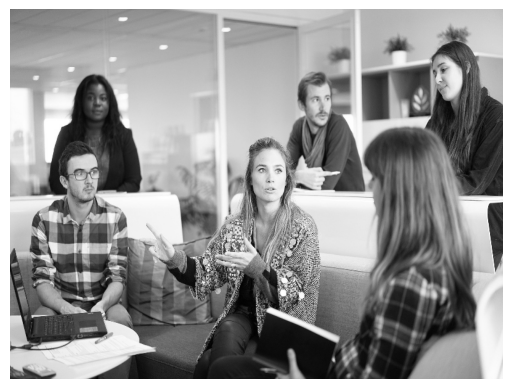

In [47]:
# Converting the image to grayscale
# - cv2.cvtColor(image, cv2.COLOR_BGR2GRAY): Converts the input image to grayscale.
#   - `image`: The input image in BGR format (in OpenCV).
#   - `cv2.COLOR_BGR2GRAY`: Specifies the color conversion code from BGR to grayscale.
#     - BGR (Blue, Green, Red) is the color order used by OpenCV, as opposed to RGB.

image_p1_gray = cv2.cvtColor(image_p1, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image using the `show_image()` function
show_image(image_p1_gray)


## 3. Detecting faces
<b>Functions used:</b>
- cv2.CascadeClassifier(cascade_path)
- face_detector.detectMultiScale(image) 
- cv2.rectangle(image, start_point, end_point, color, thickness)

In [48]:
def load_and_preprocess_image(path, new_size=None):
    """
    This function loads an image from the given path, resizes it, and converts it to grayscale.
    These functions were used earlier in separate steps.

    Returns:
    - image: The resized color image in BGR format.
    - image_gray: The resized grayscale image.
    """
    # Load the image
    image = cv2.imread(path)
    
    # # Resize the image to the specified size
    # image = cv2.resize(image, new_size)
    
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Return both the color and grayscale images
    return image, image_gray


In [49]:
# Path to the pre-trained Haar cascade classifier for face detection
face_cascade_path = '../classifiers/haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(face_cascade_path) # Load the classifier

In [50]:
# Detect faces in the grayscale image
# - detectMultiScale(image): Detects objects (faces) in the image.
#   - `image_gray`: The image to be processed (in grayscale).
#   - It returns a list of rectangles where faces are detected, in the format [x, y, w, h].
#     - (x, y): The top-left corner of the face.
#     - (w, h): The width and height of the detected face.

detections_p1 = face_detector.detectMultiScale(image_p1_gray)

# Print the number of faces detected and the coordinates
print("Each one of the rows represents a face detected")
print("Number of detections: ", len(detections_p1))  # Print the number of detected faces
print(detections_p1)  # Print the coordinates and sizes of the faces

Each one of the rows represents a face detected
Number of detections:  6
[[390 323  56  56]
 [387 233  73  73]
 [ 92 239  66  66]
 [115 124  53  53]
 [475 123  59  59]
 [677  72  68  68]]


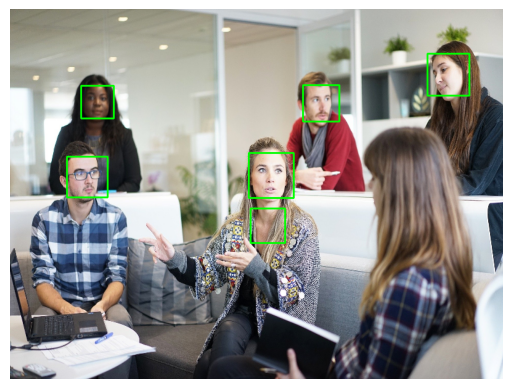

In [51]:
# Draw a rectangle around each detected face
# - cv2.rectangle(image, start_point, end_point, color, thickness): Draws a rectangle on the image.
#   - `start_point` is the top-left corner (x, y).
#   - `end_point` is the bottom-right corner (x+w, y+h).
#   - `color`: The rectangle color in BGR (green in this case: (0, 255, 0)).
#   - `thickness`: The thickness of the rectangle border.
image1_p1 = image_p1.copy()
for (x, y, w, h) in detections_p1:
    cv2.rectangle(image1_p1, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle around each face

# Show the image with the detected faces and rectangles
show_image(image1_p1)

<b>Note:</b> There might be detection errors for some faces, especially in the case of faces that are at extreme angles, partially hidden, or with poor lighting.
In the next steps, we'll adjust some hyperparameters to improve the accuracy of the face detection.

## 4. Haarcascades Parameters 

### Parameters:

**1. scaleFactor:**
- It is a number that adjusts the scale of the image during the face detection process. It is used to "scale" the image to different sizes.
- During detection, the algorithm starts with the original image size and then resizes it slightly to detect faces at different scales.
- Typically, values are between 1.1 and 1.3. Larger values may detect faces at different sizes but can also increase the number of false positives.

Example: If scaleFactor = 1.1, the image will be increased by 10% in each iteration to try and detect larger faces.

**2. minNeighbors:**
- This parameter controls how many neighbors a rectangle (face detection) needs to have to be considered a true face.
- The algorithm detects many regions that might resemble a face, but not all are actual faces. The `minNeighbors` parameter helps filter out less reliable detections.
- A higher value (e.g., 5 or 7) can reduce false positives, but it may also miss some real faces.

Example: If minNeighbors = 7, the algorithm will require a detection to have 7 neighboring rectangles for it to be considered a real face.

**3. minSize:**
- The minimum size of faces to be detected, in pixels.
- It defines the minimum size a face must have to be detected. If a face is smaller than the defined value, it will be ignored.
  
Example: If minSize = (20, 20), any face smaller than 20x20 pixels will be ignored.

**4. maxSize:**
- The maximum size of faces to be detected.
- It defines the maximum size a face can be for detection. Faces larger than the specified value will be ignored.
  
Example: If maxSize = (100, 100), any face larger than 100x100 pixels will be ignored.


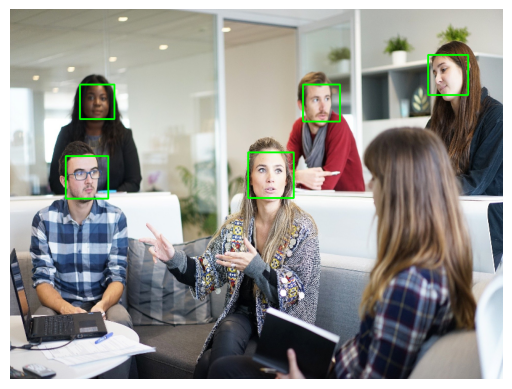

In [52]:
# Parameters
# - `scaleFactor`: This compensates for the image size difference during detection. A value > 1.0 compensates for faces appearing at different sizes.
#   - A common range is between 1.1 and 1.3.
detections = face_detector.detectMultiScale(image_p1_gray, scaleFactor=1.09)

image2_p1 = image_p1.copy()
for (x, y, w, h) in detections:
    cv2.rectangle(image2_p1, (x, y), (x + w, y + h), (0, 255, 0), 2)  

show_image(image2_p1)

In [53]:
# Function to detect faces in a given image (both color and grayscale)
# The function performs face detection and returns an image with rectangles drawn around the detected faces.
def detect_faces(image, image_gray, scaleFactor = 1.2, minNeighbors=7, minSize=(20,20), maxSize=(100,100)):
    # - `minNeighbors`: Defines how many neighbors each rectangle should have to retain it as a face. A higher value reduces false positives.
    # - `minSize` and `maxSize`: Defines the minimum and maximum sizes of the faces to be detected.
    detections = face_detector.detectMultiScale(image_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize, maxSize=maxSize)
    
    image1 = image.copy()
    for (x, y, w, h) in detections:
        cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    return image1

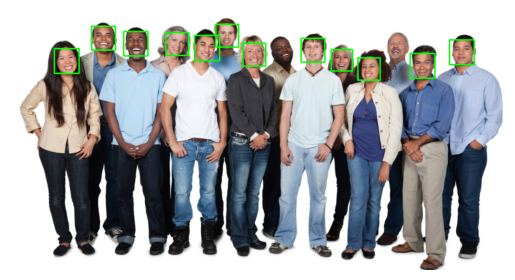

In [54]:
# Load the second image and preprocess it (resize and convert to grayscale)
path_p2 = '../imgs/people2.jpg'
image_p2, image_p2_gray = load_and_preprocess_image(path_p2)

# Detect faces in the second image and 
# display the result
# `detect_faces()` will process the image and return it with rectangles drawn around the detected faces
show_image(detect_faces(image_p2, image_p2_gray))

## 5. Eye detection with haarcascades

In [55]:
# Path to the pre-trained Haar cascade classifier for eye detection
eye_cascade_path = '../classifiers/haarcascade_eye.xml'
eye_detector = cv2.CascadeClassifier(eye_cascade_path) # Load the classifier

In [56]:
# Function to detect eyes in a given image (both color and grayscale)
# The function performs eye detection and returns an image with rectangles drawn around the detected eyes.
def detect_eyes(image, image_gray, scaleFactor = 1.2, minNeighbors=7, minSize=(20,20), maxSize=(100,100)):
    detections = eye_detector.detectMultiScale(image_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize, maxSize=maxSize)
    image1 = image.copy()
    for (x, y, w, h) in detections:
        cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 0, 255), 2) 
    return image1

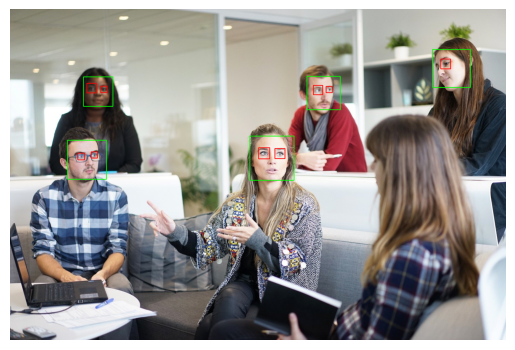

In [57]:
# Load and preprocess the first image, with the original size
image_p1_original, image_p1_gray_original = load_and_preprocess_image(path_p1)

# Detect faces in the image: 
image_faces_detected = detect_faces(image_p1_original, image_p1_gray_original, 1.3, 7, (30, 30), (200, 200))

# Now detect eyes within the detected faces:
show_image(detect_eyes(image_faces_detected, image_p1_gray_original, 1.1, 10, (20, 20), (70, 70)))


## Detecting faces with HOG

In [58]:
import dlib

In [59]:
image = cv2.imread("../imgs/people2.jpg")

In [60]:
face_detector_hog = dlib.get_frontal_face_detector()

In [61]:
# we don't need to convert the image to the grayscale
detections = face_detector_hog(image, 1)

In [62]:
detections

rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]]

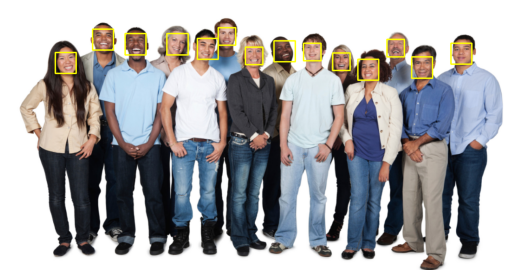

In [63]:
image_detected = image.copy()
for face in detections:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_detected, (l, t), (r, b), (0, 255, 255), 2)
show_image(image_detected)

## Detecting faces with CNN

In [64]:
image = cv2.imread("../imgs/people2.jpg")
cnn_detector = dlib.cnn_face_detection_model_v1('../weights/mmod_human_face_detector.dat')

In [65]:
detections = cnn_detector(image, 1)

1.1440682411193848
1.137049913406372
1.1278996467590332
1.1200228929519653
1.1149370670318604
1.1131553649902344
1.097571611404419
1.0942120552062988
1.085314154624939
1.0801892280578613
1.0800764560699463
1.0784764289855957
1.0664036273956299
1.0641793012619019


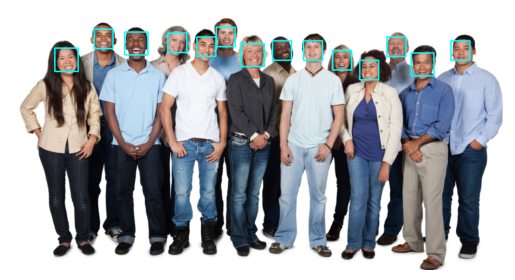

In [68]:
image_detected = image.copy()
for face in detections:
    l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
    print(c)
    cv2.rectangle(image_detected, (l, t), (r, b), (255, 255, 0), 2)
show_image(image_detected)